<a href="https://colab.research.google.com/github/kankeinai/Computational_physics/blob/main/a09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PHY270 Assignment 9: Numerical integration

Student name: Begantsova Milana

##Abstract

In this programming assignment we are going to study different methods of numerical integration, namely, Trapezoidal rule, Romberg Integration and Gauss Quadrature. We will use analytical equation for integral of a function and call it ideal one. All integration methods's results will be assesed by absolute and their running time. I will decide which numerical methods is the most convinient one by constructing a matrix that will describe computational cost and accuracy rate. According to the results of this experiment the best method for our function is Gauss Quadrature. To eliminate possibility that "poor" implementation of a solution affected the running time, I will also test python library's implementation of those methods. 

##Introduction

In mathematics, physics and other sciences, it is pretty common to describe an event through an integral of some function. In mathematics, we usually calculate surface area, volume, area under the graphs and other things. But it is not always possible to derive an analytical solution for an integral. So, people have come up with methods that desribe the complicated versions of a Reiman Series. The aim of this assignmnet is to study some of them and choose the most convinient one. 

From, Calculus classes, we know that the integral of a function, geometrically, is an area under curve:
<center>
<img src="https://calcworkshop.com/wp-content/uploads/riemann-sums-area-distances.png", height="300">
<p>Figure 1 – Reiman Series</p>
</center>

By increasing the number of rectangles we can achief such moment that the width of a rectangle will be approaching zero and we get the perfect solution.

Part 1:\
The first method is Trapesoidal rule. This is the easiest method that is not applicable in real life situtations as it gives perfect solution only for straight line (in the description part you will see how it fits area of a function). But if we apply it multiple times and do it like with Reiman Series, it will achief almost ideal solution faster than Reiman Series, because we will use trapezoids instead of rectangles (look carefully at Figure 1). This solution will be slow and can be used as lower bound (I will explain later on in the Methods section).

Part 2:\
Romberg integration is based on the Multiple trapezoidal rule, but improves it by using the Richardson extrapolations. So, now we don't increase the number of tropezoids to achief ideal result, but we combine different solution to the same problem to minimize approximation error and converge to better result much faster.

Part 3:\
If Romberg integration is an impoved version of a Trapezoidal rule, the Gauss Quadrature is something much different. We assume that we can identify such points $x$ and coefficient that if we sum everything up we will get a solution. Usually the accuracy is increasing with the number of points. It is quite comples alghorythm with solving of linear systems, so I will use a python library to compute those $t$ values and coefficient.

In those three parts I will make my implementation of those methods and compare their accuracy and running time. I will also test how python libary's result is different from my own. 

My hypothesis is that the Gauss Quadrature method will be the most convinient one since other methods rely too tightly on number of subintervals. If the number of subintervals or the interval itself is too big then it will take much time to calculate even if we optimize it by Richardson extrapolation. Gauss Quadrature instead relies on calculation of coefficients and points which can be optimized and applied to any function. Of course complex functions may require the use of many data points but even with two or three points we can get pretty accuarate result.

##Methods

In this experiment we will use three methods to calculate an integral of a function $v(t)$:
$$v(t)=\frac{gm}{c}(1-e^{\frac{-ct}{m}})$$
where $t\in[3,9]$.

We will use Trapesoidal rule, Romberg Integration and Gauss Quadrature methods to estimate the value of an integral. We will calculate an absolute error of each approximation. The theoretical values for the integral of $v(t)$, I will calculate using analytical formula [1]:  
$$\int_3^9 v(t) \ dt=\frac{gm}{c}\int_3^9 1-e^{-\frac{c}{m}t}dt=\frac{gm}{c}(t+\frac{m}{c}e^{-\frac{c}{m}t}) \ \bigg|_3^9$$
I will use formula of absolute error since we are interested in getting approximation that is as much close to the real one as possible. The formula for absolute error:
$$\varepsilon = |theory-measured|$$
The first method that I will use is a Trapesoidal rule:
$$I=\frac{f(a)+f(b)}{2}(b-a)+E$$
By trapezoidal rule we can calculate the area under curve as the area under the straight line that goes through our boundary values on interval $[a,b]$. It happens though that the are under the straight line is a trapesoid. From algebra classes we know the formula for the area of a trapesoid.

The down side of this method that it gives accurate solution only for linear functions and usually down estimates the values of an integral. The advantage of this method is that it is fast and can be calculated directly through this formula (note: we can apply it only if we know values of a function at boundary points). Usually if we devide our interval to subintervals of length $h$:
$$h=\frac{b-a}{n}$$
where $n$ is number of subintervals. And try to apply trapesoidal rule at each interval it will give much closer result though it will still down estime the value of an integral. The accuracy of this solution will depend on number of subintervals as with Reiman series. The time-complexity will also depend on number of intervals since we will apply Trapesoidal rule $n$ times. If we want to get a perfect solution it can be too slow, as the error decreases as $O(h^2) on average$.

The next method is a Romberg integration. This method combines two ideas: multiple trapezoidal rule and Richardson extrapolation. The Richardson extrapolation uses two different $h$ and finds two approximation of an integral. We know that each approximation has some error $E$, but as it turned out we can try to approximate this error and have final formula for $I$ as [2]:
$$I = I_2 + \frac{I_2-I_1}{\frac{h_1}{h_2}-1}$$
The Richardson extrapolation error decreases as $O(h^4)$. But we can do even faster.

The Romberg integration differs since it uses not two approximations, but four or eight or even sixteen if it makes sense. For example, we have four approximations. We at first combine first two toogether, then combine second two together. And do this procedure until we end up with one final result. The formula for Romberg Integration:
$$I_{j,k}=\frac{4^{k-1}I_{j+1,k-1}-I_{j,k-1}}{4^{k-1}-1}$$

The upside of this method is that it converges to better accuracy much faster than simple multiple trapezoidal rule. The error of approximation decreases as $O(h^6)$ (we can do even better if we increse the number of $I_{j}$). Though this method is much abstract and non-obvious.

Gauss-Quadtrature method relies on idea that we can find such coefficients $\omega$ and points $t$ that we can approximate the value of any integral as [2]:
$$\int_a^b f(x)dx =\frac{b-a}{2}\sum_{i=1}^n \omega_i f\left(\frac{b-a}{2}t_i+\frac{b+a}{2}\right)$$  
For this method, the only problem is the efficient algorithm that will be able to approximate those coefficients and points. For this purpose, I will use a libary `scipy.special`, a function `roots_lagrange(n)`, where n is degree/number of points. Usually the running time will depend on $n$, but it is not that big value as number of subintervals. The $n$ less than $10$ will be enough for good approximation. 

I will use built-in magic function %timeit to measure the running time of each alghoritm. It fits fine our goals since it choses optimum number of loops to to measure running time and also allows to store the result.

To compare which method is better in terms of computational cost and precision, I will normalize values of absolute errors and running time by formula:
$$value_n=\frac{value - mean(value)}{std(value)}$$
Then I will find the "distance", in terms of time rate and error rate, from the analytical solution by formula:
$$D=\sqrt{(err-err_{th})^2+(time-time_{th})^2}$$
where values with sup "th" will be rates for analytical solution. The result of this formula I will call the optimal solution coefficient. The ideal solution will have zero coefficient (which will be analyrical solution itself). I use normalized values for time and error since I don't want one of this features to impact the result more. We are interested in getting solution which will balance between precision and compuattational cost. 


##Description

In [1]:
#import all needed libraries
import numpy as np
import matplotlib.pyplot as plt


By problem definition we are given a function $v(t)$:
$$v(t)=\frac{gm}{c}(1-e^{\frac{-ct}{m}})$$
which has next coefficient: $g=9.8 \ kg \ ms^{-2}$, $m=60$, $c=12$


In [2]:
#the values of coefficient
g = np.float128(9.8)
c = np.float128(12.)
m = np.float128(60.)

#the limits of integration
t_1 = 3
t_2 = 9

#the function to compute velosity in any t
velosity = lambda t: g*m/c*(1-np.exp(-(c/m)*t))

In this programming assignment we need to calculate the value of integral $v(t)$. We can calculate an analytical solution through:
$$\int_3^9 v(t) \ dt=\frac{gm}{c}\int_3^9 1-e^{-\frac{c}{m}t}dt=\frac{gm}{c}(t+\frac{m}{c}e^{-\frac{c}{m}t}) \ \bigg|_3^9$$

In [3]:
#analytical formula for integral v(t)
vel_int = lambda t: g*m/c*(t+m/c*np.exp(-c/m*t)) 
int_theory = vel_int(t_2)-vel_int(t_1) 

print("Theoretical value of integral is ", int_theory)

Theoretical value of integral is  200.03937677125224037


This result is not perfect though since np.float128 does not have infinite number of significant figures.

In [4]:
np.finfo(np.float128).precision

18

So, np.float128 stores our values up until 18 significant figures, so we can say that the error of theoretical solution is:

In [5]:
err_theory=1e-18/2

But for simplicity of our calculations, we will assume that our analytical solution is perfect.

In [6]:
time_theory = %timeit -o vel_int(t_2)-vel_int(t_1) 

The slowest run took 10.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.96 µs per loop


Function to calculate absolute error:

In [7]:
def absolute_error(measured, theory):
  return np.abs(theory-measured)

###Trapezoidal rule

####Implementation

With trapezoidal rule, we draw a straight line through points $(a, f(a))$ and $(b, f(b))$ and then calculate the area of a resulting trapezoid. From math classes we know that the equation of a straight line through two points is:
$$f(x)=f(a)+\frac{f(b)-f(a)}{b-a}(x-a)$$

In [8]:
#approx_v is just a function to compute f(x)
approx_v = lambda t, a, b: (velosity(b)-velosity(a))/(b-a)*(t-a)+velosity(a)
#values to plot the graph
t = np.linspace(t_1, t_2, 300)

I would like to show graphically how the trapezoidal rule approximates the area under the curve:

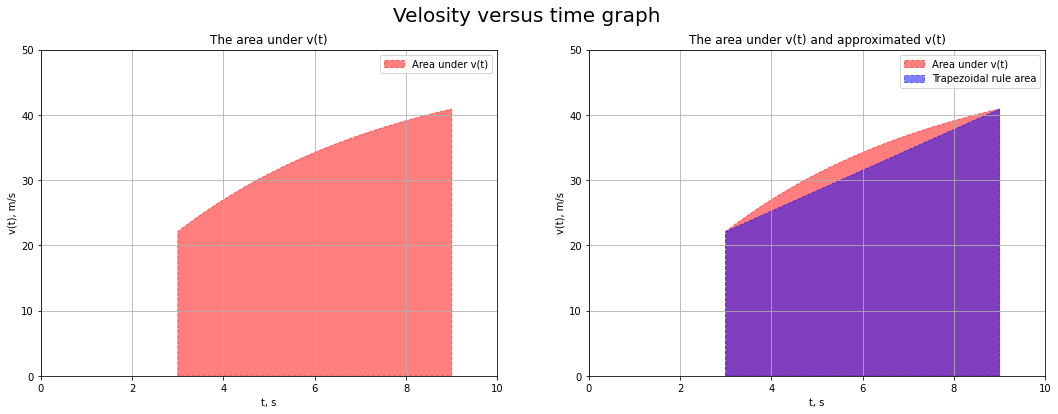

In [9]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
fig.suptitle("Velosity versus time graph", fontsize=20)
labels = ["The area under v(t)", "The area under v(t) and approximated v(t)"]
for label, ax in zip(labels, axs):
  ax.set_title(label)
  ax.fill_between(t, velosity(t), linestyle = '--',  alpha=0.5, color = 'r', label = "Area under v(t)")
  ax.set_xlim(0,10)
  ax.set_ylim(0,50)
  ax.grid()
  ax.set_xlabel("t, s")
  ax.set_ylabel("v(t), m/s")

axs[1].fill_between(t, approx_v(t, t_1, t_2), linestyle = '--',  alpha=0.5, color = 'b', label = "Trapezoidal rule area")
axs[0].legend()
axs[1].legend()
plt.show()
#Figure 1

From Figure 1.2 we see that the red area indicates the error of Trapezoidal rule. For our function $v(t)$ trapezoidal rule will give not that bad solution. It can be considered as lower bound solution.

Suppose we need to find and integral on any partion of $P=\{x_1, x_2...x_n\}$ of $a \leqslant x_1...x_n\leqslant b$
$$I=\int_a^b f(x)dx =\sum_{j=1}^nf(c_j)(x_j-x_{j-1}), \ x_{j-1} \leqslant c_j\leqslant x_j$$
If $f(x)$ is a polinomial of first order then it can be proved that the integral approximately equal to:
$$I\approx \frac{f(a)+f(b)}{2}\sum_{j=1}^n(x_j-x_{j-1})=\frac{f(a)+f(b)}{2}(b-a)$$
which is the same as formula for area of a trapezoid. Lets implement it as a function:

In [10]:
def trapezoidal_rule(f,a, b):
  return (f(a)+f(b))/2*(b-a)

In [11]:
int_trapezoid = trapezoidal_rule(velosity, t_1, t_2)
print("Value of integral with trapezoidal rule is ", int_trapezoid)

Value of integral with trapezoidal rule is  189.02575292560490698


In [12]:
err_trapezoid = absolute_error(int_trapezoid, int_theory)
print("Absolute error with trapezoidal rule is ", err_trapezoid)

Absolute error with trapezoidal rule is  11.013623845647333391


In [13]:
time_trapezoid = %timeit -o trapezoidal_rule(velosity, t_1, t_2)

The slowest run took 7.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7 µs per loop


We can improve our solution if we apply trapezoidal rule mupltiple times. We can devide our interval $[a,b]$ into $n$ sub-intervals, where each sub interval will be calculated according to formula:
$$h=\frac{b-a}{n}$$
$$x_0 = a, \ x_i = a+ih$$

And we can apply trapezoidal rule for each subinterval of $[a,b]$ to end up with more accurate solution. To show graphically how multiple Trapezoidal rule differs from single one, I will devide the interval into 5:

In [14]:
n = 5

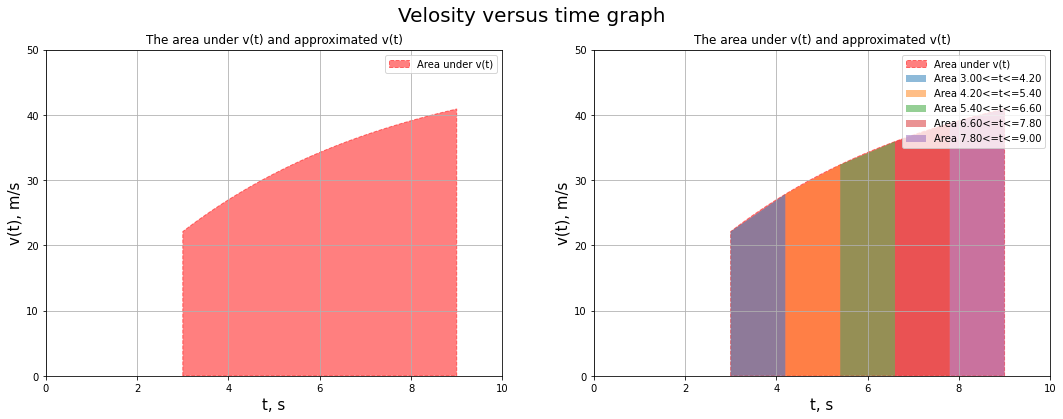

In [15]:
fig, axs = plt.subplots(1,2, figsize=(18,6))
fig.suptitle("Velosity versus time graph", fontsize=20)

for ax in axs: 
  ax.set_title(label) 
  ax.fill_between(t, velosity(t), linestyle = '--',  alpha=0.5, color = 'r', label = "Area under v(t)")
  ax.grid()
  ax.set_xlim(0,10)
  ax.set_ylim(0,50)
  ax.set_xlabel("t, s",fontsize=15)
  ax.set_ylabel("v(t), m/s",fontsize=15)

h = (t_2 - t_1)/n
t_old = t_1
for i in range(n):
  sub_t = np.linspace(t_old, t_old + h, n)
  axs[1].fill_between(sub_t, approx_v(sub_t, t_old, t_old + h), linestyle = '--',  alpha=0.5, label = f"Area {t_old:.2f}<=t<={t_old+h:.2f}")
  t_old+=h

axs[0].legend()
axs[1].legend()
plt.show()
#Figure 2

Now it is quite difficult to distinguish the red area that indicates the error of approximation. We just need to repeat trapezoidal rule $n$ times:

In [16]:
def multiple_trapezoid(f, a, b, n):
  h = (b - a)/n
  area = sum([trapezoidal_rule(f, a+h*(i-1), a+h*i) for i in range(1, n+1)])
  return area

The relative error of a multiple Trapezoidal rule, strictly depends on number of subintervals. We should draw a graph of absolute error versus number of subintervals:

In [17]:
err = []
x =[1]+[i*5 for i in range(1,81)]
for N in x:
  mult = multiple_trapezoid(velosity, t_1, t_2, N)
  err.append(absolute_error(mult, int_theory))

We will use similar graphs multiple times, so I wrote a function:

In [18]:
def show_error_graph(data):  
  fig, ax = plt.subplots(figsize=(15,10))
  ax.set_title(data['title'],fontsize=20)
  ax.plot(data['x'], data['err'], label=data['legend'], c='r')
  ax.set_xlabel(data['x_axis'],fontsize=15)
  ax.set_ylabel(data['y_axis'],fontsize=15)
  ax.set_xscale('log')
  ax.set_yscale('log')
  plt.legend()
  plt.grid()
  plt.show()

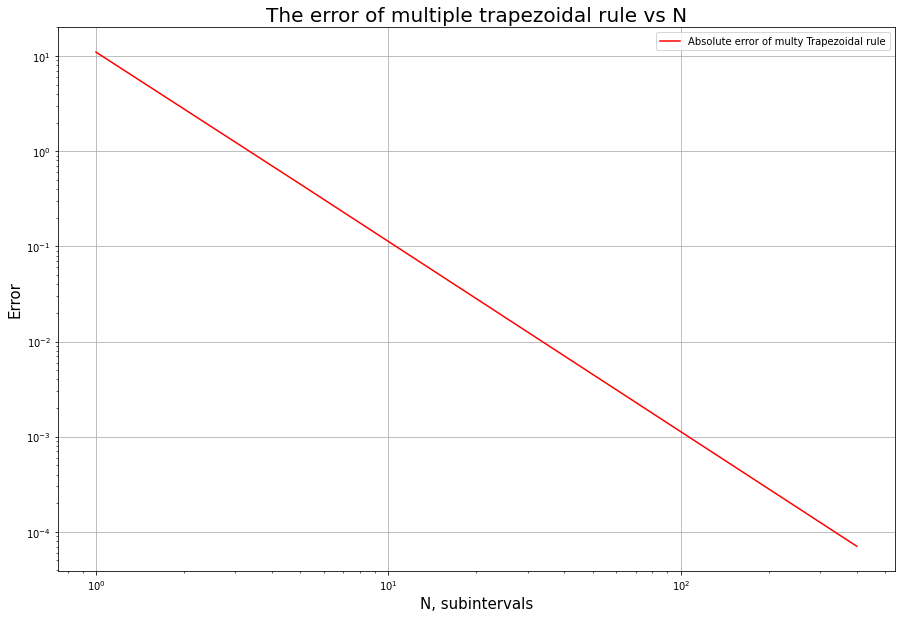

In [19]:
#settings for graph
data = {'x': x, 'err':err, 
        'title': "The error of multiple trapezoidal rule vs N", 
        'legend':"Absolute error of multy Trapezoidal rule",
        'x_axis':"N, subintervals", 'y_axis':"Error"}
show_error_graph(data)
#Figure 3

In [20]:
n=400
int_trapezoid_mult = multiple_trapezoid(velosity, t_1, t_2, n)
print("Value of integral with multiple trapezoidal rule is ", int_trapezoid_mult)

Value of integral with multiple trapezoidal rule is  200.03930630079538934


In [21]:
err_trapezoid_mult = absolute_error(int_trapezoid_mult, int_theory)
print(f"Absolute error with {n} subintervals", err_trapezoid_mult)

Absolute error with 400 subintervals 7.0470456851032259316e-05


In [22]:
time_trapezoid_mult = %timeit -o multiple_trapezoid(velosity, t_1, t_2, n)

100 loops, best of 5: 2.93 ms per loop


In [23]:
print(f"With {n} subintervals it took {time_trapezoid_mult.best/time_trapezoid.best:.2f} times longer than Trapezoidal rule\nto get accuracy {err_trapezoid/err_trapezoid_mult:.0f} times highier")

With 400 subintervals it took 418.74 times longer than Trapezoidal rule
to get accuracy 156287 times highier


If we continue increasing the number of intervals we can achief the limits of accuracy of a `numpy.float128` datatype. But the error of approximation will decrease as $O\left(h^2\right)$ (where $N$ is the number of intervals) which is quite slow.

###Romberg integration

####Implementation

Romberg integration uses ideas of Richard extrapolation and Multy Trapezoidal rule to increase better accuracy. By Richard extrapolation we can get result with highier precision if we calculate two approximations and then combine their result:
$$I = I_2 + \frac{I_2-I_1}{\frac{h_1}{h_2}-1}$$
where $I_1$ and $I_2$ are calculated with Multy-Trapezoidal rule with different $h_i$ such that $h_2 < h_1$.

Romberg Integration goes even further and assumes that we have even more $I_i$. Suppose we have $I_1(h), I_2(\frac{h}{2}), I_3(\frac{h}{4})$ and $I_4(\frac{h}{8})$. We can combine those solutions pairvise until we reach our final solution. The formula for Romberg integration:
$$I_{j,k}=\frac{4^{k-1}I_{j+1,k-1}-I_{j,k-1}}{4^{k-1}-1}$$

If we have our solution uses only one $I(h)$ then it is just simple Multi-trapezoidal rule – $O(h^2)$. If we use richard extrapolation, then our error decreases as $O(h^4)$. With Romberg integration since it combines innitially four values of $I$, its error decreases as $O(h^6)$.

In [24]:
def extrapolation(I, k):
  for i in range(0, len(I)-1):
      I[i]=(4**(k+1)*I[i+1]-I[i])/(4**(k+1)-1)
  I.pop()
  return I

In [25]:
def romberg_integration(f, a, b, n, k = 4):
  #generate approximate values of I
  I = [multiple_trapezoid(f, a, b, n*2**i) for i in range(0, k)]
  #combine them until we reach one solution
  while len(I)>1:
    I = extrapolation(I, k-len(I))
  return I.pop()

Romberg integration also depends on number of subintervals:

In [26]:
err_romberg = []
x_romberg = np.arange(1, 30)
for N in x_romberg:
  romberg = romberg_integration(velosity, t_1, t_2, N)
  err_romberg.append(absolute_error(romberg, int_theory))

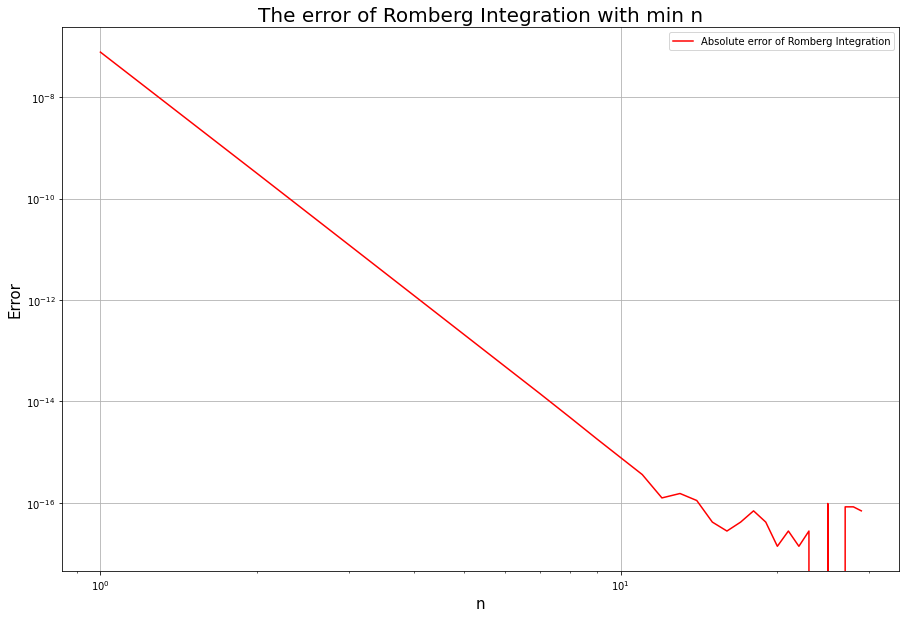

In [27]:
#graph settings
data_romberg = {'x': x_romberg, 'err': err_romberg, 
        'title': f"The error of Romberg Integration with min n", 
        'legend':"Absolute error of Romberg Integration",
        'x_axis':"n", 'y_axis':"Error"}
show_error_graph(data_romberg)
#Figure 4

In [28]:
n = 15
int_romberg = romberg_integration(velosity, t_1, t_2, n)
print("Value of integral with Romberg integration rule is ", int_romberg)

Value of integral with Romberg integration rule is  200.03937677125224041


In [29]:
err_romberg = absolute_error(int_romberg, int_theory)
print(f"Absolute error of Romberg Integration k=3 is ", err_romberg)

Absolute error of Romberg Integration k=3 is  4.1633363423443370266e-17


In [30]:
time_romberg = %timeit -o romberg_integration(velosity, t_1, t_2, n)

1000 loops, best of 5: 1.65 ms per loop


In [31]:
print(f"Romberg integration took {time_romberg.best/time_trapezoid.best:.2f} times longer than Trapezoidal rule\nto get accuracy {err_trapezoid/err_romberg:.0f} times higher")

Romberg integration took 235.70 times longer than Trapezoidal rule
to get accuracy 264538411985366080 times higher


We can increase number of levels even further and get $O(h^8)$ if we innitialy generate 8 different values of $I$

In [32]:
err_romberg_new = []
x_romberg = np.arange(1, 10)
for N in x_romberg:
  romberg = romberg_integration(velosity, t_1, t_2, N, 8)
  err_romberg_new.append(absolute_error(romberg, int_theory))

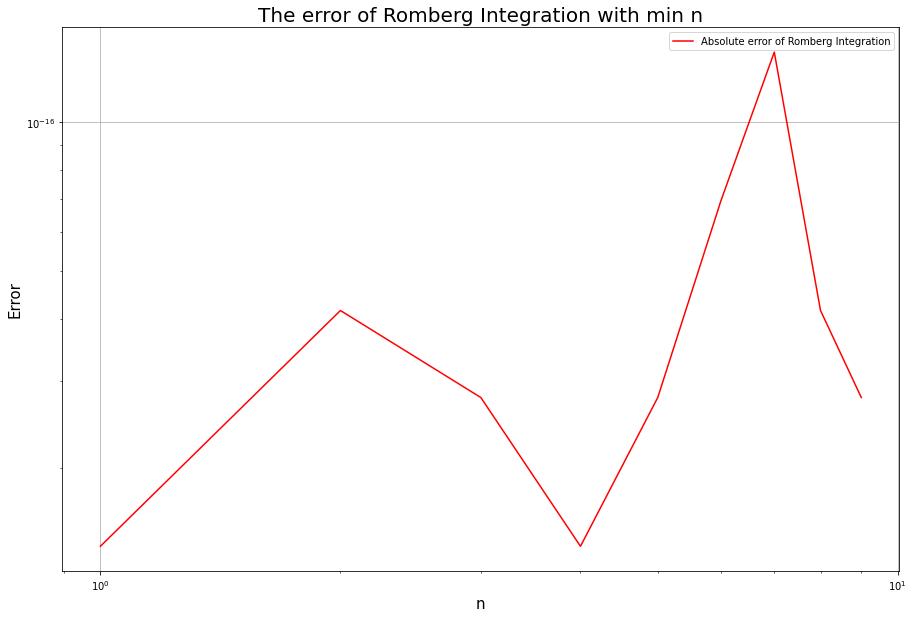

In [33]:
data_romberg_new = {'x': x_romberg, 'err': err_romberg_new, 
        'title': f"The error of Romberg Integration with min n", 
        'legend':"Absolute error of Romberg Integration",
        'x_axis':"n", 'y_axis':"Error"}
show_error_graph(data_romberg_new)
#Figure 4

In [34]:
n = 1
int_romberg_new = romberg_integration(velosity, t_1, t_2, n, 8)
print("Value of integral with Romberg integration k=4 rule is ", int_romberg_new)

Value of integral with Romberg integration k=4 rule is  200.03937677125224036


In [35]:
err_romberg_new = absolute_error(int_romberg_new, int_theory)
print(f"Absolute error of Romberg Integration k=4 is ", err_romberg_new)

Absolute error of Romberg Integration k=4 is  1.3877787807814456755e-17


In [36]:
time_romberg_new = %timeit -o romberg_integration(velosity, t_1, t_2, n, 8)

1000 loops, best of 5: 1.92 ms per loop


In [37]:
print(f"Romberg integration took {time_romberg_new.best/time_trapezoid.best:.2f} times longer than Trapezoidal rule\nto get accuracy {err_trapezoid/err_romberg_new:.0f} times highier")

Romberg integration took 274.23 times longer than Trapezoidal rule
to get accuracy 793615235956098176 times highier


With different levels of Romberg integration, I achieved maximum precision of $\approx 1.4\cdot 10^{-17}$. Romberg integration with level=4 achieved this accuracy slightly faster. At the moment this is the best accuracy that I could achieved in $2ms$.

####Python library

The `scipy.integrate` library has Romberg alghoritm, lets compare perfomcances of implementations:

In [38]:
from scipy.integrate import romberg
int_scipy_romberg = romberg(velosity, t_1, t_2, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7ffb2f3f60e0> from [3, 9]

 Steps  StepSize   Results
     1  6.000000 189.025753 
     2  3.000000 197.237327 199.974519 
     4  1.500000 199.335727 200.035193 200.039238 
     8  0.750000 199.863267 200.039113 200.039375 200.039377 
    16  0.375000 199.995337 200.039360 200.039377 200.039377 200.039377 

The final result is 200.03937677124119864 after 17 function evaluations.


In [39]:
err_scipy_romberg = absolute_error(int_scipy_romberg , int_theory)
print(f"Absolute error of Scipy Romberg Integration is ", err_scipy_romberg)

Absolute error of Scipy Romberg Integration is  1.1041736969197302187e-11


In [40]:
time_scipy_romberg = %timeit -o romberg(velosity, t_1, t_2)

1000 loops, best of 5: 151 µs per loop


In [41]:
print(f"Romberg integration took {time_scipy_romberg.best/time_trapezoid.best:.2f} times longer than Trapezoidal rule\nto get accuracy {err_trapezoid/err_scipy_romberg:.0f} times highier")

Romberg integration took 21.56 times longer than Trapezoidal rule
to get accuracy 997453922003 times highier


The result of `scipy.integrate` is much lower in precision, but faster than mine implementation. I suppose that they use $n=1$ to achiev such precision and number of solutions is 5.

In [42]:
n = 1
int_romberg_check = romberg_integration(velosity, t_1, t_2, n, 5)
print("Value of integral with Romberg integration k=4 rule is ", int_romberg_new)
err_romberg_check = absolute_error(int_romberg_check , int_theory)
print(f"Absolute error of Scipy Romberg Integration is ", err_romberg_check)

Value of integral with Romberg integration k=4 rule is  200.03937677125224036
Absolute error of Scipy Romberg Integration is  1.1041764724772917816e-11


In [43]:
time_romberg_check = %timeit -o romberg_integration(velosity, t_1, t_2, n, 5)

1000 loops, best of 5: 249 µs per loop


So, I can conlcude that my solution and python's are almost the same, but my implementation allows to set to greater precision through additional computation cost.

###Gauss Quadrature

####Implementation

According to Gauss method we can calculate integral of any function if we choose right coefficients and values for $t$:
$$\int_a^b f(x)dx = \frac{b-a}{2}\int_{-1}^{1}f\left(\frac{b-a}{2}t+\frac{b+a}{2}\right)dt=\frac{b-a}{2}\sum_{i=1}^n \omega_i f\left(\frac{b-a}{2}t_i+\frac{b+a}{2}\right)=\frac{b-a}{2}\omega \cdot f\left(\frac{b-a}{2}t+\frac{b+a}{2}\right)$$

We can approximate these roots and coefficient using python library called `scipy.special` [2]:

In [44]:
from scipy.special import roots_legendre

In [45]:
#the formula for gauss quadrature
def gauss_quadrature(a,b, n=10):
  x_gauss, w_gauss = roots_legendre(n)
  return np.dot(w_gauss,velosity(((b-a)*x_gauss+b+a)/2))*(b-a)/2

The precision of Gauss Quadrature depends on number of roots, so I need to look at the graph of absolute error versus $n$:

In [46]:
err_gauss_quad = []
x_gauss_quad = np.arange(1, 51)
for N in x_gauss_quad:
  gauss_quad = gauss_quadrature(t_1, t_2, N)
  err_gauss_quad.append(absolute_error(gauss_quad, int_theory))

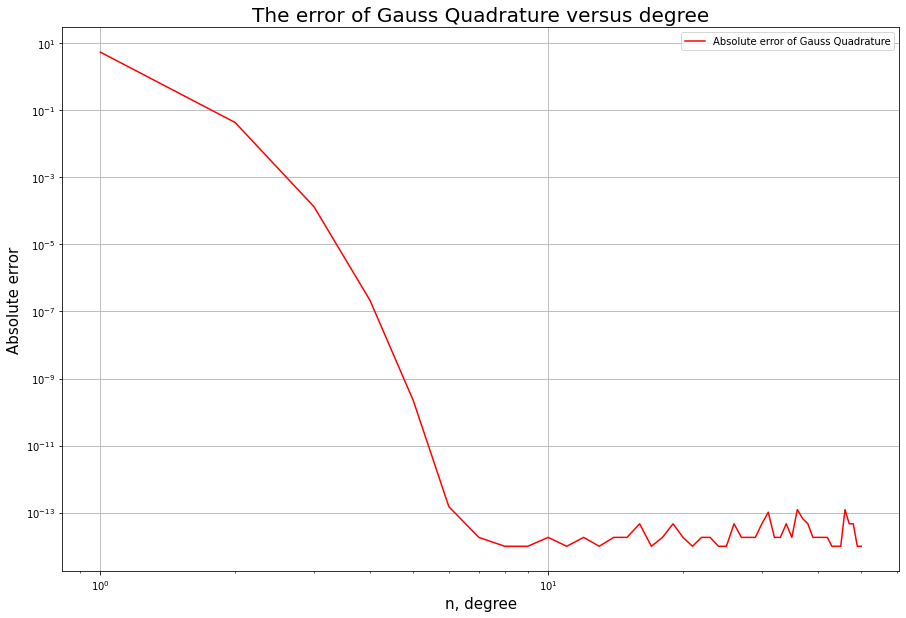

In [47]:
#settings for graph
data_gauss_quad = {'x': x_gauss_quad, 'err': err_gauss_quad, 
        'title': f"The error of Gauss Quadrature versus degree", 
        'legend':"Absolute error of Gauss Quadrature",
        'x_axis':"n, degree", 'y_axis':"Absolute error"}
show_error_graph(data_gauss_quad)
#Figure 4

Solution seems to converge to global minimum at $n=9$:

In [48]:
int_gauss_quad = gauss_quadrature(t_1, t_2, 9)
print("Value of integral with Gauss Quadrature n=9 is ", int_gauss_quad)

Value of integral with Gauss Quadrature n=9 is  200.03937677125225


In [60]:
err_gauss_quad = absolute_error(int_gauss_quad , int_theory)
print(f"Absolute error of Gauss Quadrature n=9 is ", err_gauss_quad)

Absolute error of Gauss Quadrature n=9 is  9.992007221626408864e-15


In [50]:
time_gauss_quad = %timeit -o gauss_quadrature(t_1, t_2, 9)

The slowest run took 5.94 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 102 µs per loop


In [51]:
print(f"Romberg integration took {time_gauss_quad.best/time_trapezoid.best:.2f} times longer than Trapezoidal rule\nto get accuracy {err_trapezoid/err_gauss_quad:.0f} times highier")

Romberg integration took 14.64 times longer than Trapezoidal rule
to get accuracy 1102243383272359 times highier


####Python library

In [52]:
from scipy.integrate import quad
int_scipy_quad = quad(velosity, t_1, t_2)[0]
print("Value of integral with Scipy Gauss Quadrature is ", int_scipy_quad)

Value of integral with Scipy Gauss Quadrature is  200.03937677125225


In [53]:
err_scipy_quad = absolute_error(int_scipy_quad, int_theory)
print(f"Absolute error of Scipy Gauss Quadrature is ", err_scipy_quad)

Absolute error of Scipy Gauss Quadrature is  9.992007221626408864e-15


In [54]:
time_scipy_quad = %timeit -o quad(velosity, t_1, t_2)[0]

10000 loops, best of 5: 68 µs per loop


In [55]:
print(f"Scipy Gauss Quadrature took {time_gauss_quad.best/time_scipy_quad.best:.2f} times longer than my implementation\nto get accuracy {err_gauss_quad/err_scipy_quad:.0f} times highier")

Scipy Gauss Quadrature took 1.51 times longer than my implementation
to get accuracy 1 times highier


In [56]:
#generate the table with results of experiment
import pandas as pd
time = np.array([time_theory.best, time_trapezoid.best, time_trapezoid_mult.best, time_romberg.best, time_romberg_new.best, 
        time_scipy_romberg.best, time_gauss_quad.best, time_scipy_quad.best])
error = np.array([err_theory, err_trapezoid, err_trapezoid_mult, err_romberg, err_romberg_new, 
         err_scipy_romberg, err_gauss_quad, err_scipy_quad])
label = ["Analytical","Trapezoidal rule", "Multy-trapezoidal rule", 
          "Romberg Integration k=3", "Romberg Integration k=4",
          "Romberg Integration Python", "Gauss Quadrature n=9", "Gauss Quadrature Python"]

conclusion = pd.DataFrame({"Method": label,
              "Value":[f"{int_theory:.17f}",f"{int_trapezoid:.17f}", f"{int_trapezoid_mult:.17f}", 
                       f"{int_romberg:.17f}", f"{int_romberg_new:.17f}", f"{int_scipy_romberg:.17f}", 
                       f"{int_gauss_quad:.17f}", f"{int_scipy_quad:.17f}"],
              "Time":  time, "Absolute error": error})

Normalize data and calculate coeficient of optimality as described in the methods section:

In [57]:
def normalize(data):
  return (data-np.mean(data))/np.std(data)
def optimum(error, time):
  error = normalize(error)
  time = normalize(time)
  return np.sqrt((error-error[0])**2+(time-time[0])**2)

coef = optimum(error, time)
conclusion['Optimal solution coefficient'] = coef


##Conclusion

In the table below you can see the results of our experiment. According to this table, we achieved the maximum accuracy with mine implrmrntation of Romberg Integration. But this solution is not the most optimal in terms of compuattaional cost and precision. So, to identify the most optimal solution I introduced optimal solution coefficient. 

In [58]:
 conclusion

,Method,Value,Time,Absolute error,Optimal solution coefficient
0,Analytical,200.03937677125225036,0.000007,5.000000e-19,0.000000
1,Trapezoidal rule,189.02575292560490539,0.000007,1.101362e+01,3.023719
2,Multy-trapezoidal rule,200.03930630079540265,0.002929,7.047046e-05,2.727514
3,Romberg Integration k=3,200.03937677125225036,0.001649,4.163336e-17,1.532433
4,Romberg Integration k=4,200.03937677125225036,0.001918,1.387779e-17,1.783996
5,Romberg Integration Python,200.03937677124119432,0.000151,1.104174e-11,0.134260
6,Gauss Quadrature n=9,200.03937677125225036,0.000102,9.992007e-15,0.089089
7,Gauss Quadrature Python,200.03937677125225036,0.000068,9.992007e-15,0.056932


According to this coefficient all methods can be arranged in the next order: 
0. Analytical solution
The most efficient ones:
1. Gauss Quadrature Python
2. Gauss Quadrature n=9
3. Romberg Integration Python

The places for those solutions depends on settings (may vary):
4. Romberg Integration k=4 (high precision, time consuming)
5. Romberg Integration k=3 (high precision, time consuming)

The least efficient ones:
6. Multy-trapezoidal rule (time consuming)
7. Trapezoidal rule (low precision)

I can graphically plot the corelation between computational cost and precision:

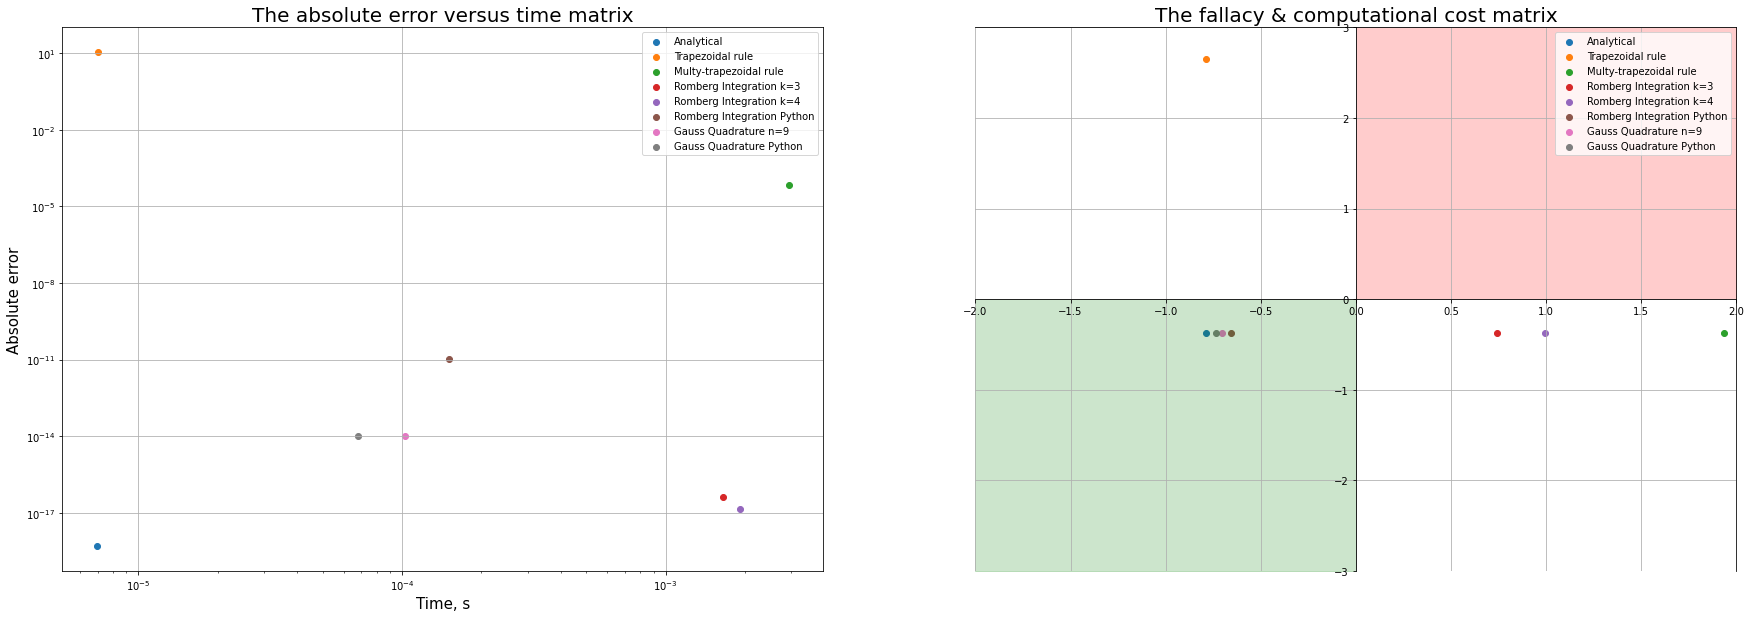

In [59]:
fig, axs = plt.subplots(1,2, figsize=(30,10))
axs[0].set_title("The absolute error versus time matrix", fontsize=20)
axs[1].set_title("The fallacy & computational cost matrix", fontsize=20)

for x, y, l in zip(normalize(time), normalize(error), label):
  axs[1].scatter(x, y, label = l)
for x, y, l in zip(time, error, label):
  axs[0].scatter(x, y, label = l)

axs[0].set_ylabel("Absolute error", fontsize=15)
axs[0].set_xlabel("Time, s", fontsize=15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].set_xlim(-2,2)
axs[1].set_ylim(-3,3)
axs[1].spines['left'].set_position('center')
axs[1].spines['bottom'].set_position('center')

x=np.linspace(-2,0,5)
y=np.ones(5)*(-3)
axs[1].fill_between(x,y,color="g",alpha=0.2)
axs[1].fill_between(-x,-y, color="r", alpha=0.2)

for ax in axs:
  ax.legend()
  ax.grid()

plt.show()

Those methods that are placed in the green area on average require less time to get high precision. The read area indicates that the method is time consuming and precision is low (x-axis is time rate, y-axis is precision). For our function we can use any method from the green area: Gauss Quadrature Scipy implementation, Gauss Quadrature (mine), Romberg Integration Scipy. Both mine and scipy implementation have shown that Gauss Quadrature methods is the most optimal one. In the second place there is Romberg Integration. And the multy-trapezoidal rule is the least efficient one for our function. My implementation of Romberg Integration is not that bad that Scipy's, we just tried to achief the maximum precision.

In this experiment we studied different methods of numerical integration and identified the most optimal method in terms of computational cost and precision. We understood the importance of research the corellation between compuational cost and precision, as in the future it could be vital issue to find the balance. In future, I would probably choose a different function. If you look at Figure 1 right now, you will understand that the function is pretty close the polinomial of first order. So, it is understandable that we can get pretty good approximation even with Trapezoidal rule. It would be intersting if we approximated sin function on bigger interval. And see how the results would be different from ours. Probaly, it will just require more compuational cost. 

Overall, this experiment helped me to use on practice different methods of integration which will be useful when finding analytical solution will be complicated. Or at least, if we have too many equations, these methods will be universal.

##Links
[1] Numerical Integration I. Retrieved from: https://www.youtube.com/watch?v=f1KsSaJrY-o&list=PLy0giqEzkJNiUkrNqszvG39J9hHTEWRa5&index=19 \
[2] Romberg Integration and Gauss Quadrature. Retrieved from: https://www.youtube.com/watch?v=eixp1LQWmt4&list=PLy0giqEzkJNiUkrNqszvG39J9hHTEWRa5&index=20 \
[3] Scipy Documentation. Retrieved from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html